In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [391]:
df = pd.read_csv("/kaggle/input/ultimate-car-price-prediction-dataset/Clean Data_pakwheels.csv")
df.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [392]:
df = df.drop(columns="Unnamed: 0")

In [393]:
df.shape

(46022, 13)

In [394]:
df.isnull().sum().sum()

0

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Price                46022 non-null  int64 
 3   Model Year           46022 non-null  int64 
 4   Location             46022 non-null  object
 5   Mileage              46022 non-null  int64 
 6   Engine Type          46022 non-null  object
 7   Engine Capacity      46022 non-null  int64 
 8   Color                46022 non-null  object
 9   Assembly             46022 non-null  object
 10  Body Type            46022 non-null  object
 11  Transmission Type    46022 non-null  object
 12  Registration Status  46022 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.6+ MB


In [396]:
df.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [397]:
df.columns

Index(['Company Name', 'Model Name', 'Price', 'Model Year', 'Location',
       'Mileage', 'Engine Type', 'Engine Capacity', 'Color', 'Assembly',
       'Body Type', 'Transmission Type', 'Registration Status'],
      dtype='object')

In [398]:
df["Company Name"].unique()

array(['Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Nissan', 'Daihatsu',
       'Audi', 'Chevrolet', 'Mercedes', 'Hyundai', 'Daewoo', 'BMW', 'FAW',
       'Range', 'DFSK', 'KIA', 'Lexus', 'United', 'SsangYong', 'Mazda',
       'Subaru', 'Porsche', 'Chery', 'Fiat', 'Land', 'MINI', 'Hummer',
       'Jeep', 'Jaguar', 'Adam', 'Volvo'], dtype=object)

In [399]:
df["Company Name"].nunique()

31

In [400]:
from sklearn.preprocessing import LabelEncoder

In [401]:
le = LabelEncoder()
nazar = le.fit_transform(df["Company Name"])

In [402]:
df.columns

Index(['Company Name', 'Model Name', 'Price', 'Model Year', 'Location',
       'Mileage', 'Engine Type', 'Engine Capacity', 'Color', 'Assembly',
       'Body Type', 'Transmission Type', 'Registration Status'],
      dtype='object')

In [413]:
columns_to_encode = ["Model Name","Registration Status","Transmission Type","Body Type","Color","Location","Model Name","Company Name","Assembly","Engine Type"]

In [414]:
label_encoder = LabelEncoder()

In [415]:
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Company Name         46022 non-null  int64
 1   Model Name           46022 non-null  int64
 2   Price                46022 non-null  int64
 3   Model Year           46022 non-null  int64
 4   Location             46022 non-null  int64
 5   Mileage              46022 non-null  int64
 6   Engine Type          46022 non-null  int64
 7   Engine Capacity      46022 non-null  int64
 8   Color                46022 non-null  int64
 9   Assembly             46022 non-null  int64
 10  Body Type            46022 non-null  int64
 11  Transmission Type    46022 non-null  int64
 12  Registration Status  46022 non-null  int64
dtypes: int64(13)
memory usage: 4.6 MB


In [417]:
x = df.drop(columns="Price")
y = df["Price"]

In [418]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [419]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.fit_transform(x_test)

In [420]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.predict(x_test)

array([1347280. , 1889982.5,  753700. , ..., 3033050. , 1405225. ,
       1634200. ])

In [421]:
y_pred = rf.predict(x_test)

In [422]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_pred,y_test)

0.9455164949166543

In [423]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,x_train,y_train,cv=5).mean()

0.9509669963536341

In [424]:
bike = pd.DataFrame({"Actual value":y_test,"Predicted":y_pred})
bike

,Actual value,Predicted
43741,1399000,1.347280e+06
34149,2050000,1.889982e+06
15431,750000,7.537000e+05
32045,2150000,2.207475e+06
26491,750000,6.940364e+05
...,...,...
4396,14500000,1.323800e+07
2156,1065000,1.125414e+06
18869,3300000,3.033050e+06
30524,650000,1.405225e+06


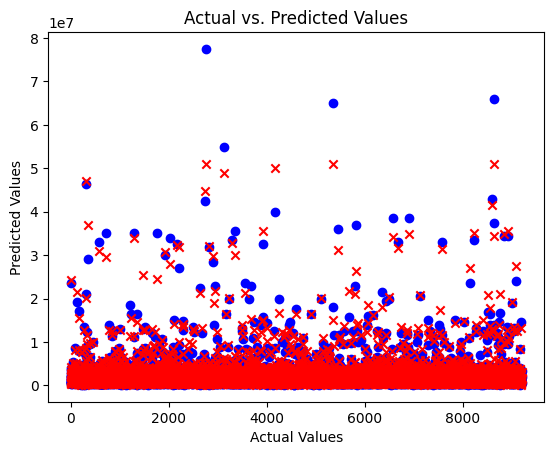

In [425]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

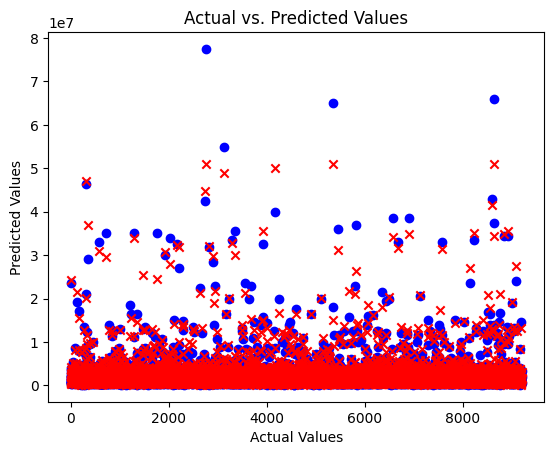

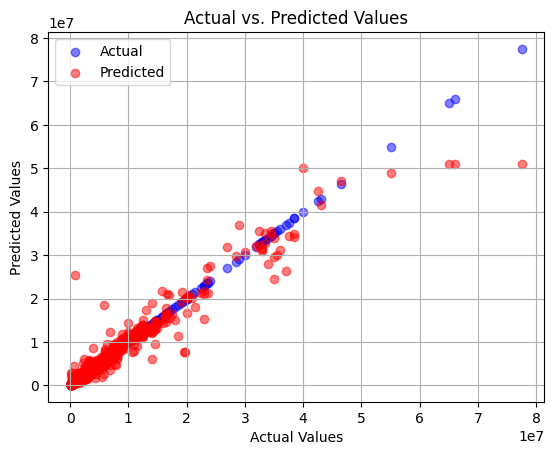

In [426]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5) # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5) # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()